# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+'&q='+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat= city_weather["coord"]["lat"]
        city_lng= city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"] 
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        city_date=city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat":city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | villazon
Processing Record 3 of Set 1 | a coruna
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | luderitz
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 9 of Set 1 | sanok
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | karmaskaly
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | yaan
Processing Record 20 of Set 1 | te horo
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | arraial do cabo
Processing Re

Processing Record 35 of Set 4 | paamiut
Processing Record 36 of Set 4 | fort nelson
Processing Record 37 of Set 4 | omboue
Processing Record 38 of Set 4 | sulmona
Processing Record 39 of Set 4 | half moon bay
Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | cayhagan
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 0 of Set 5 | broome
Processing Record 1 of Set 5 | aki
Processing Record 2 of Set 5 | vila
Processing Record 3 of Set 5 | palasa
Processing Record 4 of Set 5 | vaini
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | pevek
Processing

Processing Record 23 of Set 8 | el badari
City not found. Skipping...
Processing Record 24 of Set 8 | ambon
Processing Record 25 of Set 8 | ola
Processing Record 26 of Set 8 | havoysund
Processing Record 27 of Set 8 | quebec
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | chimbote
Processing Record 30 of Set 8 | auki
Processing Record 31 of Set 8 | arkadelphia
Processing Record 32 of Set 8 | rawson
Processing Record 33 of Set 8 | alyangula
Processing Record 34 of Set 8 | acapulco
Processing Record 35 of Set 8 | mul
Processing Record 36 of Set 8 | bilibino
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | eyl
Processing Record 41 of Set 8 | tonkino
Processing Record 42 of Set 8 | bathsheba
Processing Record 43 of Set 8 | caningay
Processing Record 44 of Set 8 | narsaq
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | tubuala
Processing Record 4

Processing Record 13 of Set 12 | camopi
Processing Record 14 of Set 12 | tirukkoyilur
Processing Record 15 of Set 12 | senador guiomard
Processing Record 16 of Set 12 | sungairaya
Processing Record 17 of Set 12 | grand-santi
Processing Record 18 of Set 12 | kimparana
Processing Record 19 of Set 12 | helmsdale
Processing Record 20 of Set 12 | warqla
City not found. Skipping...
Processing Record 21 of Set 12 | grand gaube
Processing Record 22 of Set 12 | brigantine
Processing Record 23 of Set 12 | shimoda
Processing Record 24 of Set 12 | krasnovishersk
Processing Record 25 of Set 12 | eureka
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | abnub
Processing Record 28 of Set 12 | zahesi
Processing Record 29 of Set 12 | baneh
Processing Record 30 of Set 12 | mirandela
Processing Record 31 of Set 12 | ayr
Processing Record 32 of Set 12 | phan rang
City not found. Skipping...
Processing Record 33 of Set 12 | natal
Processing Record 34 of Set 12 | la ligua
Processing Rec

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,53.44,36,100,8.99,US,1675718339
1,Villazon,-22.0866,-65.5942,55.96,53,99,15.39,BO,1675718452
2,A Coruna,43.3713,-8.3960,47.79,66,0,5.75,ES,1675718454
3,Bluff,-46.6000,168.3333,58.01,87,85,24.43,NZ,1675718455
4,Luderitz,-26.6481,15.1594,64.67,91,8,14.38,NA,1675718456


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saint George,37.1041,-113.5841,53.44,36,100,8.99,US,1675718339
1,Villazon,-22.0866,-65.5942,55.96,53,99,15.39,BO,1675718452
2,A Coruna,43.3713,-8.3960,47.79,66,0,5.75,ES,1675718454
3,Bluff,-46.6000,168.3333,58.01,87,85,24.43,NZ,1675718455
4,Luderitz,-26.6481,15.1594,64.67,91,8,14.38,NaN,1675718456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

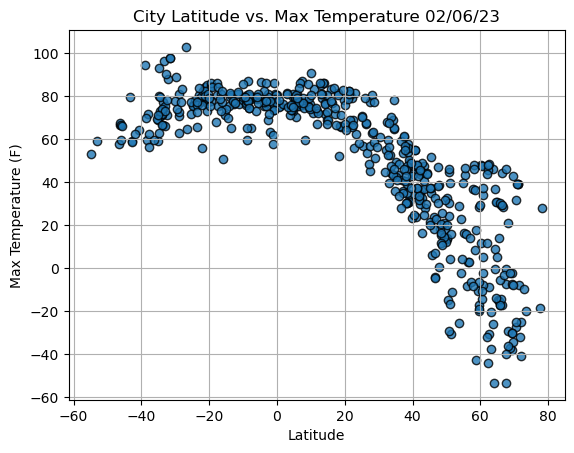

In [13]:
# Build scatter plot for latitude vs. temperature
lats=city_data_df['Lat']
maxTemps=city_data_df['Max Temp']
plt.scatter(lats,maxTemps,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

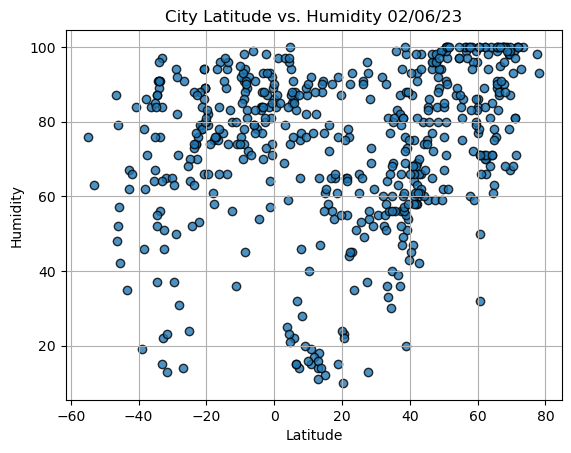

In [14]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(lats,humidity,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

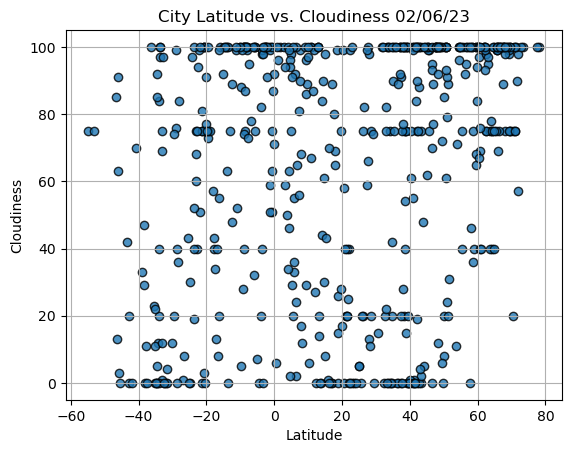

In [15]:
# Build the scatter plots for latitude vs. cloudiness
cloudy = city_data_df["Cloudiness"]
plt.scatter(lats,cloudy,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

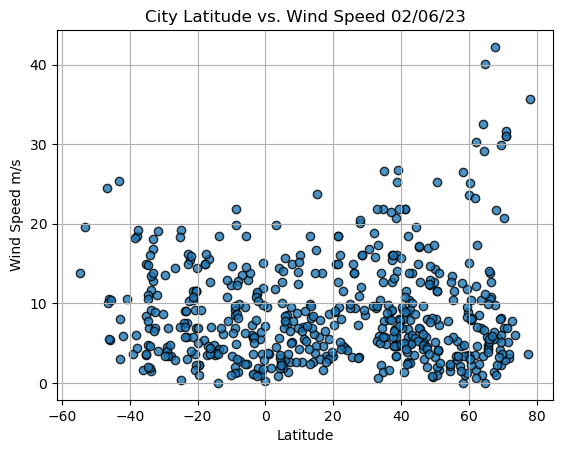

In [16]:
# Build the scatter plots for latitude vs. wind speed
windy= city_data_df["Wind Speed"]
plt.scatter(lats,windy,edgecolor='black',linewidths=1,marker='o',alpha=0.8,label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Saint George,37.1041,-113.5841,53.44,36,100,8.99,US,1675718339
2,A Coruna,43.3713,-8.3960,47.79,66,0,5.75,ES,1675718454
7,Sanok,49.5557,22.2056,18.27,99,72,0.78,PL,1675718458
8,Hamilton,39.1834,-84.5333,49.42,51,0,4.61,US,1675717920
9,Salalah,17.0151,54.0924,71.69,56,0,4.61,OM,1675718459


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Villazon,-22.0866,-65.5942,55.96,53,99,15.39,BO,1675718452
3,Bluff,-46.6000,168.3333,58.01,87,85,24.43,NZ,1675718455
4,Luderitz,-26.6481,15.1594,64.67,91,8,14.38,NaN,1675718456
5,Puerto Ayora,-0.7393,-90.3518,85.96,74,51,15.01,EC,1675718457
6,Hermanus,-34.4187,19.2345,71.80,91,12,6.91,ZA,1675718458


###  Temperature vs. Latitude Linear Regression Plot

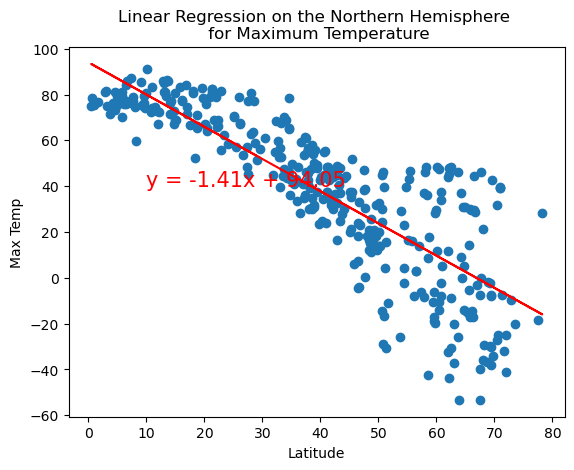

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

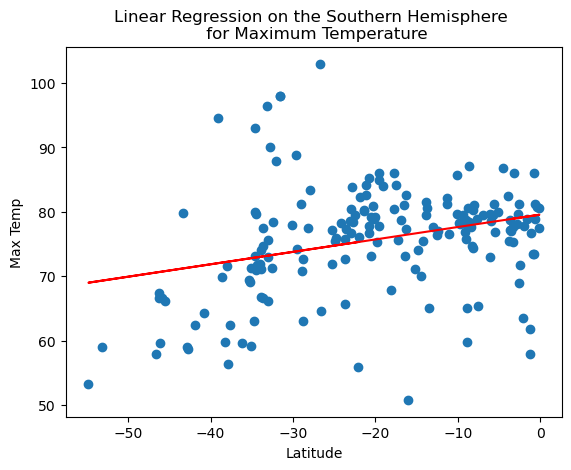

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

**Discussion about the linear relationship:** The Northen Hemisphere has a strong negative linear relationship between Max Temp and Latitudes. The Southern has a fairly strong positive linear relationship between Max Temp and Latitude

### Humidity vs. Latitude Linear Regression Plot

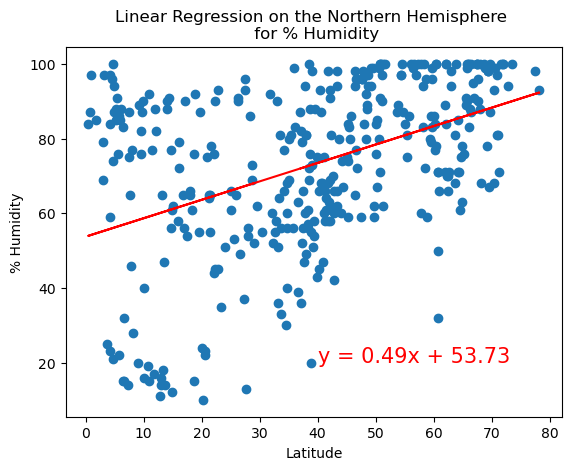

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

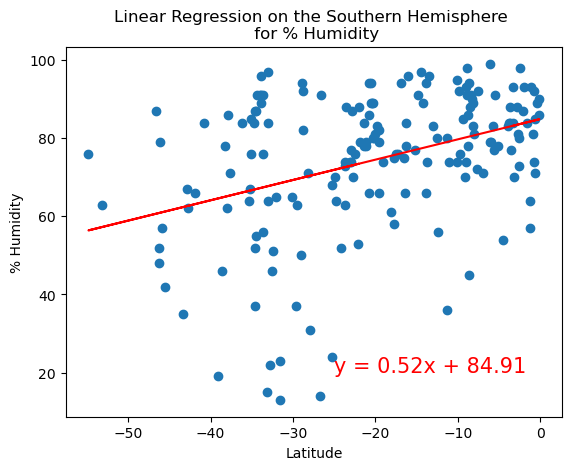

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

**Discussion about the linear relationship:** Both Hemispheres had a decently strong positive linear regression between latitudes and humidity percent.

### Cloudiness vs. Latitude Linear Regression Plot

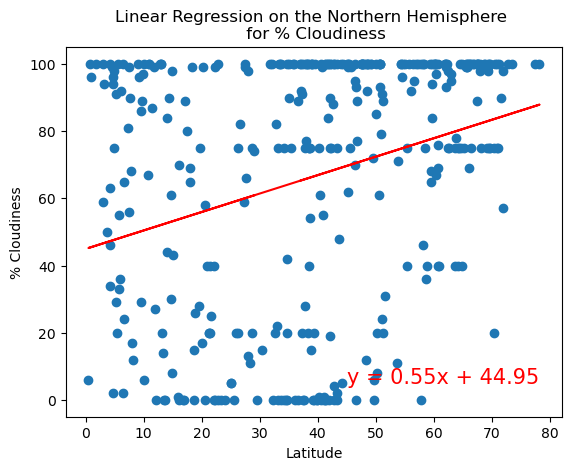

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

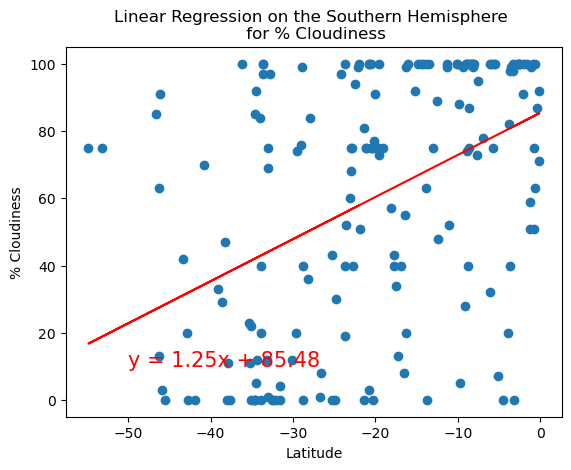

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

**Discussion about the linear relationship:** Both Hemispheres have a positive linear correlation between their latitudes and cloudiness, the south even more so!

### Wind Speed vs. Latitude Linear Regression Plot

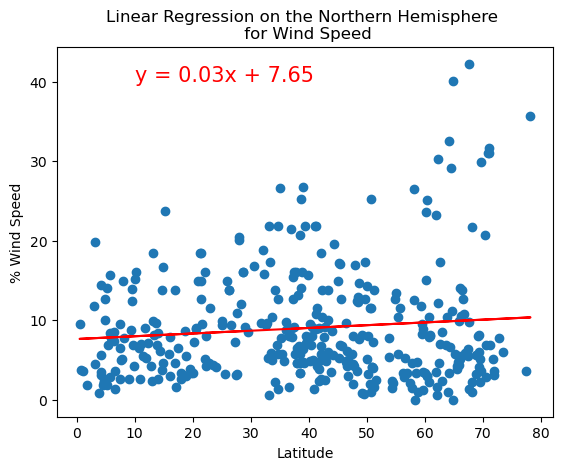

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "% Wind Speed",(10,40))

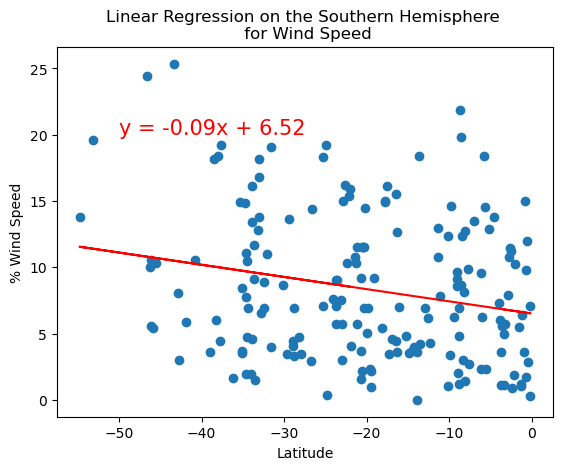

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** The Northern hemisphere had a positive correlation while the south had a negative, however, looking at the data, it is fairly clear to see there in no linear correlation between latitude and wind speed